In [1]:
from gee_tools import initialize_gee, XeeDataset  

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
initialize_gee('ee-ehsanjalilvand')


Successfully saved authorization token.
Successfully authenticated and initialized Earth Engine


In [3]:
# Example 1) MODIS NDVI
# Create instance
dataset = XeeDataset('MODIS/061/MOD13A2')
dataset.ee_bands()

,bands
0,NDVI
1,EVI
2,DetailedQA
3,sur_refl_b01
4,sur_refl_b02
5,sur_refl_b03
6,sur_refl_b07
7,ViewZenith
8,SolarZenith
9,RelativeAzimuth


In [4]:
# instance inputs
lon_min, lon_max = -125.0, -66.9  # Longitude range
lat_min, lat_max = 24.4, 49.4     # Latitude range
bbox = [lat_min, lat_max, lon_min, lon_max]
var = 'NDVI'
scale = 0.01

# Chain operations
result = (dataset.
          ee_subset_time(['2020-01-01', '2020-12-31']).
          ee_crop(bbox).
          ee_var_sel(var).
          to_xarray(scale, var).
          xr_crop(bbox))
result.data

<xarray.DataArray 'NDVI' (time: 23, lon: 5810, lat: 2500)> Size: 1GB
[334075000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 184B 2020-01-01 2020-01-17 ... 2020-12-18
  * lon      (lon) float64 46kB -125.0 -125.0 -125.0 ... -66.92 -66.92 -66.91
  * lat      (lat) float64 20kB 24.41 24.41 24.43 24.44 ... 49.38 49.39 49.4
Attributes:
    id:             NDVI
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': -32768, ...
    dimensions:     [43200, 16800]
    crs:            EPSG:4326
    crs_transform:  [926.625433055833, 0, -20015109.354, 0, -926.625433055833...

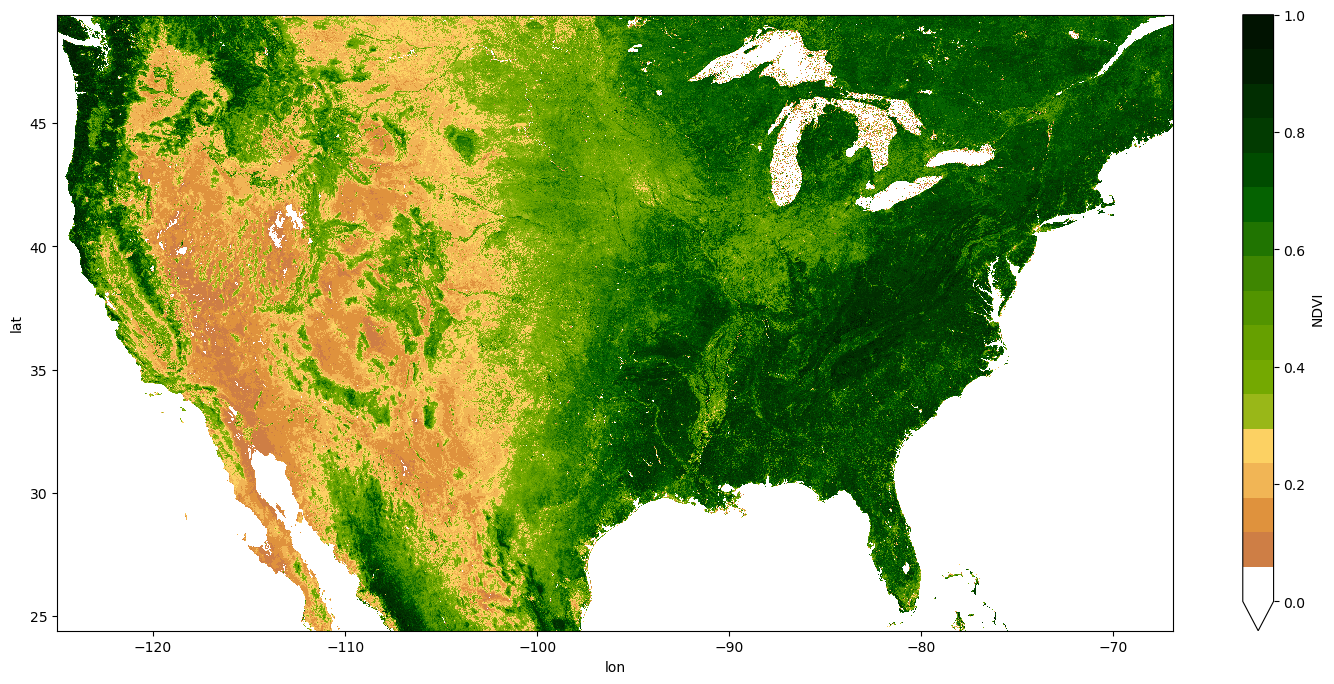

In [5]:
# Calculate monthly mean
monthly_mean = result.calculate_monthly_mean(9)*.0001

from matplotlib.colors import ListedColormap
palette = [
    '#ffffff', '#ce7e45', '#df923d', '#f1b555', '#fcd163', '#99b718',
    '#74a901', '#66a000', '#529400', '#3e8601', '#207401', '#056201',
    '#004c00', '#023b01', '#012e01', '#011d01', '#011301'
]
cmap = ListedColormap(palette)
monthly_mean.plot(x = 'lon',figsize = [18,8],cmap = cmap,vmin =0)

In [6]:
# Example (2) SMAP

ee_smap = XeeDataset('NASA/SMAP/SPL3SMP_E/006')
ee_smap.ee_bands()

,bands
0,soil_moisture_am
1,tb_h_corrected_am
2,tb_v_corrected_am
3,vegetation_water_content_am
4,retrieval_qual_flag_am
5,tb_qual_flag_h_am
6,tb_qual_flag_v_am
7,soil_moisture_pm
8,tb_h_corrected_pm
9,tb_v_corrected_pm


In [7]:
# instance inputs
var = 'soil_moisture_am'
scale = 0.09

# Chain operations
result = (ee_smap.
          ee_subset_time(['2021-01-01', '2021-12-31']).
          ee_crop(bbox).
          ee_var_sel(var).
          to_xarray(scale, var))
          # xr_crop(bbox))
result.data

<xarray.DataArray 'soil_moisture_am' (time: 362, lon: 4000, lat: 2000)> Size: 12GB
[2896000000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-30
  * lon      (lon) float64 32kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat      (lat) float64 16kB -89.95 -89.86 -89.78 ... 89.78 89.87 89.96
Attributes:
    id:             soil_moisture_am
    data_type:      {'type': 'PixelType', 'precision': 'float'}
    dimensions:     [4500, 2126]
    crs:            EPSG:4326
    crs_transform:  [0.08, 0, -180, 0, -0.08, 85.0445018795655]

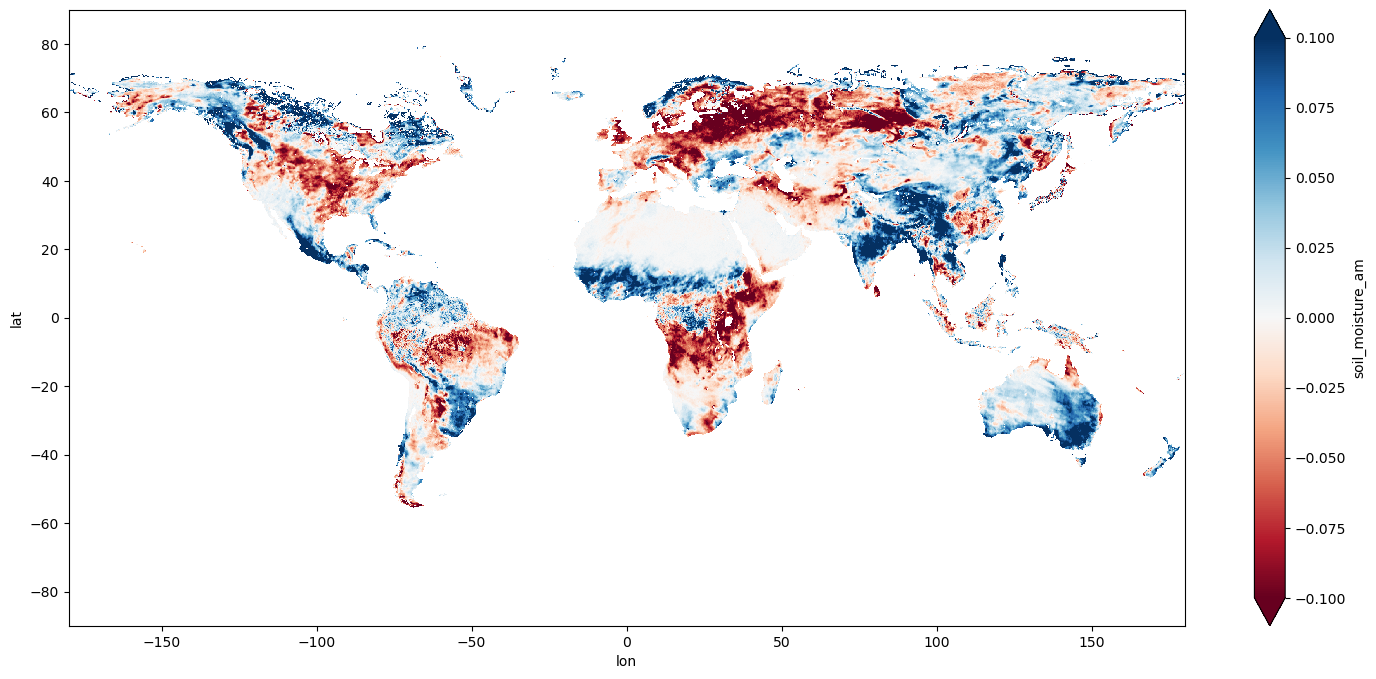

In [8]:
# Calculate monthly mean
jun = result.calculate_monthly_mean(5)
jul = result.calculate_monthly_mean(6)
diff = jul-jun
diff.plot(x = 'lon',figsize = [18,8],vmin = -.1,vmax = .1,cmap = 'RdBu')